## LOADING DATA

In [1]:
# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [22]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
from dateutil.parser import parse

In [38]:
# loading datasets
train = pd.read_csv('data/train.csv', parse_dates=['Date'])
test = pd.read_csv('data/test.csv', parse_dates=['Date'])
store = pd.read_csv('data/store.csv')

In [39]:
# checking train dataset
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [40]:
# checking test dataset
test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [41]:
# checking store dataset
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


The store dataset contains extra information about each store in the train and test sets. Therefore the store dataframe will be merged with the train and test dataframes.

In [42]:
# merging train and store
df_train = pd.merge(train, store, on='Store')
df_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [43]:
# merging test and store
df_test = pd.merge(test, store, on='Store')
df_test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,857,1,3,2015-09-16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1713,1,2,2015-09-15,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,2569,1,1,2015-09-14,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,3425,1,7,2015-09-13,0.0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,37664,1115,3,2015-08-05,1.0,1,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
41084,38520,1115,2,2015-08-04,1.0,1,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
41085,39376,1115,1,2015-08-03,1.0,1,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
41086,40232,1115,7,2015-08-02,0.0,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


## PREPROCESSING

In [54]:
# checking column meta data in train set
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [45]:
# checking column meta data in test set
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Id                         41088 non-null  int64         
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Date                       41088 non-null  datetime64[ns]
 4   Open                       41077 non-null  float64       
 5   Promo                      41088 non-null  int64         
 6   StateHoliday               41088 non-null  object        
 7   SchoolHoliday              41088 non-null  int64         
 8   StoreType                  41088 non-null  object        
 9   Assortment                 41088 non-null  object        
 10  CompetitionDistance        40992 non-null  float64       
 11  CompetitionOpenSinceMonth  25872 non-null  float64       
 12  Comp

In [46]:
df_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [49]:
# function to fill missing column values using median
def median_fill(df, col):
    df[col] = df[col].fillna(df[col].median())

    return df[col]

# function to fill missing values using mode
def mode_fill(df, col):
    df[col] = df[col].fillna(df[col].mode()[0])

    return df[col]

# function to fill missing values based on column types
def fill_cols(df):
    for i in df.columns:
        if df.dtypes[i] == 'float64':
            df[i] = median_fill(df, i)
        elif df.dtypes[i] == 'O':
            df[i] = mode_fill(df, i)
        else: continue
    
    return df

In [50]:
# filling missing values
df_train = fill_cols(df_train)

## SEASONALITY IN TRAIN AND TEST SET

In [105]:
# For train set
# Prepare data
df_train['year'] = [d.year for d in df_train.Date]
df_train['month'] = [d.strftime('%b') for d in df_train.Date]
df_train['weekday'] = df_train['Date'].dt.day_name().index
years = df_train['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Sales', data=df_train, ax=axes[0])
sns.boxplot(x='month', y='Sales', data=df_train)

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [87]:
df_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,weekday
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,Jul,Friday
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,Jul,Thursday
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,Jul,Wednesday
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,Jul,Tuesday
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,Jul,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,...,5350.0,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,Jan,Saturday
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,...,5350.0,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,Jan,Friday
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,...,5350.0,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,Jan,Thursday
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,...,5350.0,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,Jan,Wednesday


## CHECKING AND COMPARING SALES BEFORE, DURING AND AFTER HOLIDAYS

In [57]:
# checking values in state holidays column
df_train.StateHoliday.value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [59]:
# creating dataframe with enteries during holidays
df_dh = df_train.loc[(df_train['StateHoliday'].str.contains('a|b|c', flags=re.I, regex=True, na=False))]
df_bh

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month
57,1,4,2015-06-04,0,0,0,1,a,0,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,Jun
67,1,1,2015-05-25,0,0,0,0,a,0,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,May
78,1,4,2015-05-14,0,0,0,0,a,0,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,May
91,1,5,2015-05-01,0,0,0,1,a,0,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,May
116,1,1,2015-04-06,0,0,0,0,b,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,Apr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017080,1115,4,2013-05-09,0,0,0,0,a,0,d,c,5350.0,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,May
1017088,1115,3,2013-05-01,0,0,0,1,a,0,d,c,5350.0,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,May
1017118,1115,1,2013-04-01,0,0,0,0,b,1,d,c,5350.0,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,Apr
1017121,1115,5,2013-03-29,0,0,0,1,b,1,d,c,5350.0,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,Mar


In [65]:
# creating dataframe with enteries before and after holidays
df_bah = df_train.loc[~(df_train['StateHoliday'].str.contains('a|b|c', flags=re.I, regex=True, na=False))]
df_bah

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,Jul
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,Jul
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,Jul
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,Jul
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017203,1115,7,2013-01-06,0,0,0,0,0,1,d,c,5350.0,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,Jan
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,Jan
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,Jan
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,Jan


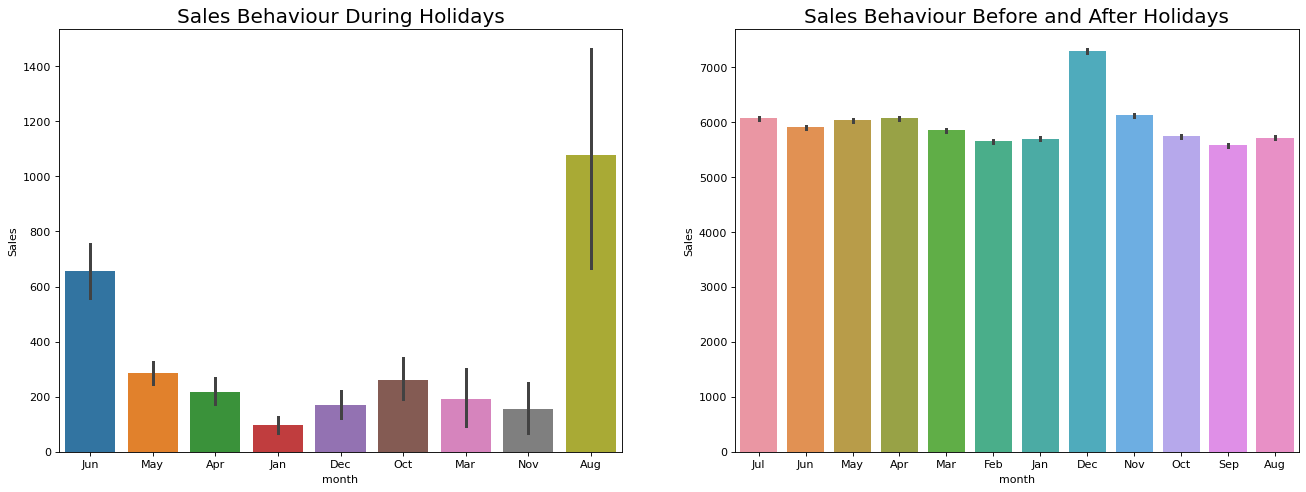

In [67]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.barplot(x='month', y='Sales', data=df_dh, ax=axes[0])
sns.barplot(x='month', y='Sales', data=df_bah)

# Set Title
axes[0].set_title('Sales Behaviour During Holidays', fontsize=18); 
axes[1].set_title('Sales Behaviour Before and After Holidays', fontsize=18)
plt.show()

## SEASONAL PURCHASE BEHAVIOURS

### PUBLIC HOLIDAYS

In [118]:
# creating dataframe with enteries for public holidays
df_a = df_train.loc[(df_train['StateHoliday'].str.contains('a', flags=re.I, regex=True, na=False))]
df_a

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,weekday
57,1,4,2015-06-04,0,0,0,1,a,0,c,...,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,Jun,Thursday
67,1,1,2015-05-25,0,0,0,0,a,0,c,...,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,May,Monday
78,1,4,2015-05-14,0,0,0,0,a,0,c,...,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,May,Thursday
91,1,5,2015-05-01,0,0,0,1,a,0,c,...,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,May,Friday
211,1,4,2015-01-01,0,0,0,0,a,1,c,...,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,Jan,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017059,1115,4,2013-05-30,0,0,0,1,a,0,d,...,5350.0,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,May,Thursday
1017069,1115,1,2013-05-20,0,0,0,0,a,0,d,...,5350.0,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,May,Monday
1017080,1115,4,2013-05-09,0,0,0,0,a,0,d,...,5350.0,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,May,Thursday
1017088,1115,3,2013-05-01,0,0,0,1,a,0,d,...,5350.0,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,May,Wednesday


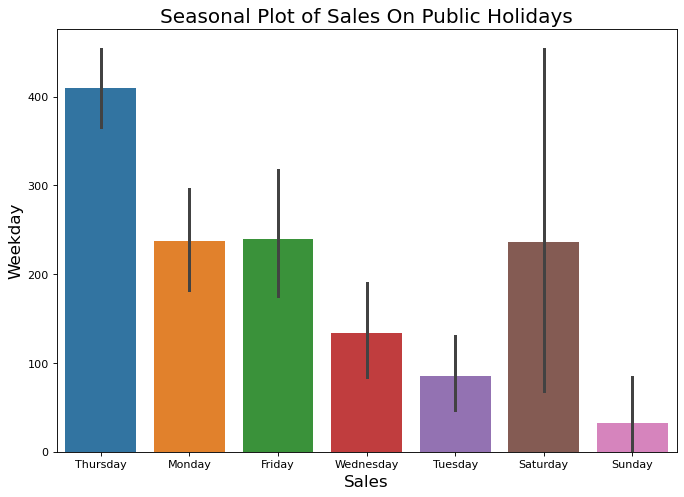

In [127]:
# Draw Plot
plt.figure(figsize=(10,7), dpi= 80)
sns.barplot(x='weekday', y='Sales', data=df_a)

plt.title('Seasonal Plot of Sales On Public Holidays', fontsize=18)
plt.xlabel('Sales',fontsize=15)
plt.ylabel('Weekday',fontsize=15)
plt.show()

### EASTER HOLIDAYS

In [120]:
# creating dataframe with enteries for easter holidays
df_b = df_train.loc[(df_train['StateHoliday'].str.contains('b', flags=re.I, regex=True, na=False))]
df_b

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,weekday
116,1,1,2015-04-06,0,0,0,0,b,1,c,...,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,Apr,Monday
119,1,5,2015-04-03,0,0,0,1,b,1,c,...,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,Apr,Friday
466,1,1,2014-04-21,0,0,0,0,b,1,c,...,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2014,Apr,Monday
469,1,5,2014-04-18,0,0,0,1,b,1,c,...,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2014,Apr,Friday
851,1,1,2013-04-01,0,0,0,0,b,1,c,...,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2013,Apr,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016386,1115,5,2015-04-03,0,0,0,1,b,1,d,...,5350.0,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2015,Apr,Friday
1016733,1115,1,2014-04-21,0,0,0,0,b,1,d,...,5350.0,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2014,Apr,Monday
1016736,1115,5,2014-04-18,0,0,0,1,b,1,d,...,5350.0,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2014,Apr,Friday
1017118,1115,1,2013-04-01,0,0,0,0,b,1,d,...,5350.0,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,Apr,Monday


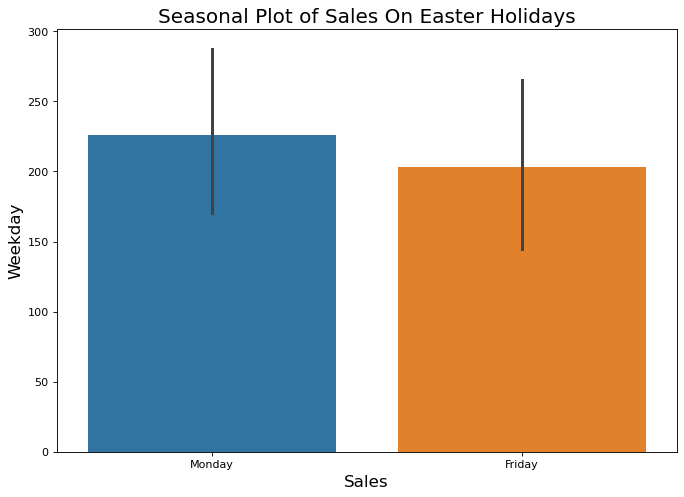

In [126]:
# Draw Plot
plt.figure(figsize=(10,7), dpi= 80)
sns.barplot(x='weekday', y='Sales', data=df_b)

plt.title('Seasonal Plot of Sales On Easter Holidays', fontsize=18)
plt.xlabel('Sales',fontsize=15)
plt.ylabel('Weekday',fontsize=15)
plt.show()

### CHRISTMAS HOLIDAYS

In [122]:
# creating dataframe with enteries for christmas holidays
df_c = df_train.loc[(df_train['StateHoliday'].str.contains('c', flags=re.I, regex=True, na=False))]
df_c

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,weekday
217,1,5,2014-12-26,0,0,0,0,c,1,c,...,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2014,Dec,Friday
218,1,4,2014-12-25,0,0,0,0,c,1,c,...,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2014,Dec,Thursday
582,1,4,2013-12-26,0,0,0,0,c,1,c,...,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2013,Dec,Thursday
583,1,3,2013-12-25,0,0,0,0,c,1,c,...,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2013,Dec,Wednesday
1159,2,5,2014-12-26,0,0,0,0,c,1,a,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2014,Dec,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015908,1114,3,2013-12-25,0,0,0,0,c,1,a,...,870.0,8.0,2010.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2013,Dec,Wednesday
1016484,1115,5,2014-12-26,0,0,0,0,c,1,d,...,5350.0,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2014,Dec,Friday
1016485,1115,4,2014-12-25,0,0,0,0,c,1,d,...,5350.0,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2014,Dec,Thursday
1016849,1115,4,2013-12-26,0,0,0,0,c,1,d,...,5350.0,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,Dec,Thursday


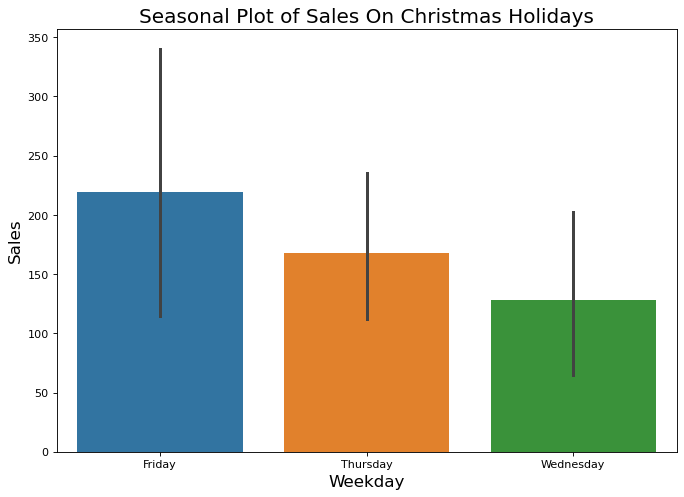

In [128]:
# Draw Plot
plt.figure(figsize=(10,7), dpi= 80)
sns.barplot(x='weekday', y='Sales', data=df_c)

plt.title('Seasonal Plot of Sales On Christmas Holidays', fontsize=18)
plt.xlabel('Weekday',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.show()